# Overview

**Context** : 

Data were extracted from images that were taken from genuine and forged banknote-like specimens. The final images have 400×400 pixels. Due to the object lens and distance to the investigated object gray-scale, pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

**Content** :

The first four columns are features and the last column is label.

 - Variance of Wavelet Transformed Image
 - Skewness of Wavelet Transformed Image
 - Curtosis of Wavelet Transformed Image
 - Entropy of Image
 
**Output Feature / Label :** 1 - Real ; 0 - Fake

# Let's Work 

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 

In [2]:
# Reading the dataset

data = pd.read_csv('C:\\Users\\dell\\Desktop\\bank_note_data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
Image.Var     1372 non-null float64
Image.Skew    1372 non-null float64
Image.Curt    1372 non-null float64
Entropy       1372 non-null float64
Class         1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [4]:
data.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
print("Total Columns : ", len(data.columns))

Total Columns :  5


In [9]:
# Total Labels
data['Class'].value_counts()

0    762
1    610
Name: Class, dtype: int64

## Input and Output Data

In [10]:
X = data[data.columns[0:4]].values
y = data[data.columns[4]].values

In [11]:
print(X.shape)

(1372, 4)


## Using OneHotEncoder

In [16]:
def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels,n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode

In [17]:
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
Y = one_hot_encode(y)

In [18]:
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)

Y = one_hot_encode(y)

In [19]:
Y[0]

array([ 1.,  0.])

## Training and Testing Data

As our output column has labels arranged together, so we first shuffle our data

In [20]:
X,Y = shuffle (X, Y, random_state = 10)

In [21]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size =0.20, random_state=20)

In [22]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)

(1097, 4)
(1097, 2)
(275, 4)


# Neural Net Model

In [25]:
learning_rate = 0.1
training_epochs = 1000

In [26]:
n_dim = X.shape[1]
print("n_dim = ", n_dim)

n_class = 2

n_dim =  4


In [27]:
cost_history = np.empty(shape=[1],dtype=float)

## 4 layer Dense Neural Networks

In [29]:
n_hidden_1 = 4
n_hidden_2 = 4
n_hidden_3 = 4
n_hidden_4 = 4 

In [30]:
x = tf.placeholder(tf.float32, [None, n_dim])
W = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32, [None, n_class])

In [31]:
# Define the model
def multilayer_perceptron(x, weights, biases):
 
    # Hidden layer with RELU activationsd
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
 
    # Hidden layer with sigmoid activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
 
    # Hidden layer with sigmoid activation
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.relu(layer_3)
 
    # Hidden layer with RELU activation
    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
    layer_4 = tf.nn.sigmoid(layer_4)
 
    # Output layer with linear activation
    out_layer = tf.matmul(layer_4, weights['out']) + biases['out']
    return out_layer
 

In [32]:
# Define the weights for each layers
 
weights = {
    'h1': tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_4, n_class]))
}

In [33]:
# Define the bias for each layers

biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4': tf.Variable(tf.truncated_normal([n_hidden_4])),
    'out': tf.Variable(tf.truncated_normal([n_class]))
}

In [34]:
init = tf.global_variables_initializer()

In [35]:
# Calling model
y = multilayer_perceptron(x, weights, biases)

## Cost Function

In [36]:
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)


## Initializing Session

In [37]:
sess = tf.Session()
sess.run(init) 

In [38]:
mse_history = []
accuracy_history = []

## Training Model

In [39]:
for epoch in range(training_epochs):
    sess.run(training_step, feed_dict = {x: train_x, y_: train_y})
    cost = sess.run(cost_function, feed_dict={x: train_x, y_: train_y})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    pred_y = sess.run(y, feed_dict = {x: test_x})
    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    mse_ = sess.run(mse)
    mse_history.append(mse_)
    accuracy = (sess.run(accuracy, feed_dict={x: train_x, y_: train_y}))
    accuracy_history.append(accuracy)
    
    if epoch % 100 == 0:
        print('epoch : ', epoch, ' ; ', 'cost: ', cost, " ; MSE: ", mse_, "- Train Accuracy: ", accuracy )
 

epoch :  0  ;  cost:  0.85057  ; MSE:  1.3118237796 - Train Accuracy:  0.434822
epoch :  100  ;  cost:  0.361078  ; MSE:  1.03008433382 - Train Accuracy:  0.867821
epoch :  200  ;  cost:  0.13538  ; MSE:  1.50727001509 - Train Accuracy:  0.984503
epoch :  300  ;  cost:  0.0845989  ; MSE:  1.97608615829 - Train Accuracy:  0.993619
epoch :  400  ;  cost:  0.0631968  ; MSE:  2.35555999861 - Train Accuracy:  0.994531
epoch :  500  ;  cost:  0.0529877  ; MSE:  2.67703233446 - Train Accuracy:  0.994531
epoch :  600  ;  cost:  0.0471359  ; MSE:  2.95158544394 - Train Accuracy:  0.994531
epoch :  700  ;  cost:  0.0434087  ; MSE:  3.19127154077 - Train Accuracy:  0.994531
epoch :  800  ;  cost:  0.0408515  ; MSE:  3.40378500507 - Train Accuracy:  0.994531
epoch :  900  ;  cost:  0.0389987  ; MSE:  3.59474805623 - Train Accuracy:  0.994531


## Cost Graph

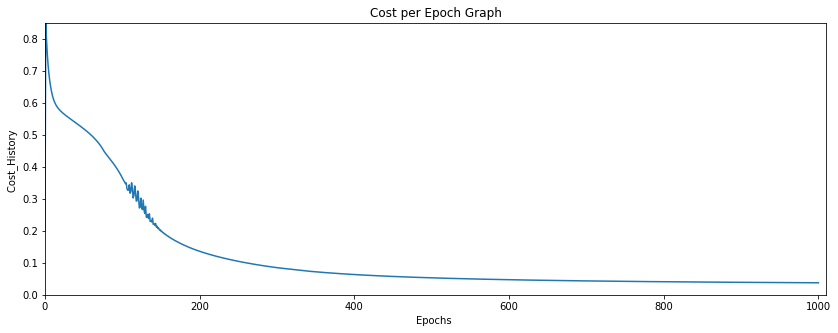

In [43]:
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel('Epochs ')
plt.ylabel('Cost_History ')
plt.title("Cost per Epoch Graph")
plt.xlim(0, training_epochs + 10)
plt.ylim(0, np.max(cost_history))
plt.rcParams['figure.figsize'] = [12, 5]
plt.show()

# Accuracy Graph

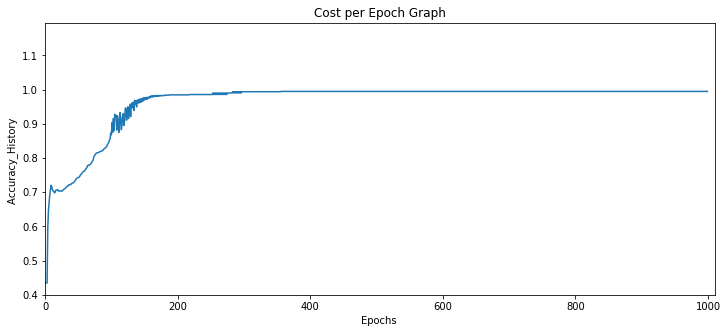

In [47]:
plt.plot(range(len(accuracy_history)), accuracy_history)
plt.xlabel('Epochs ')
plt.ylabel('Accuracy_History ')
plt.title("Cost per Epoch Graph")
plt.xlim(0, training_epochs + 10)
plt.ylim(0.4, np.max(accuracy_history)+0.2)
plt.rcParams['figure.figsize'] = [12, 5]
plt.show()

### Accuracy

In [48]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Test Accuracy: ", (sess.run(accuracy, feed_dict={x: test_x, y_: test_y})))

Test Accuracy:  0.989091


### Mean Square Error

In [49]:
pred_y = sess.run(y, feed_dict={x: test_x})
mse = tf.reduce_mean(tf.square(pred_y - test_y))
print("MSE: %.4f" % sess.run(mse))

MSE: 3.7671


.

Thanks for having a look. If u like the Deep Neural Network approach, Pls give a LIKE to my kernel :)